# Tracer concentration on shelf bottom

Map hcw on shelf by looking at bottom cells and multiplying their concentration by their area.


The algorithm:

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

import matplotlib.cm as cm

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import pandas as pd

import os 

import sys

import seaborn as sns


In [7]:
lib_path = os.path.abspath('../../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
#lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts

sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [8]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [9]:
#Base case, iso =1 , No 3d diff.
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
#CanyonGrid='/Users/Karina/Research/PhD/Tracers/TemporaryData/CNTDIFF/run03/gridGlob.nc'

CanyonGridOut = Dataset(CanyonGrid)

#NoCCanyonGrid='/Users/Karina/Research/PhD/Tracers/TemporaryData/CNTDIFF/run07/gridGlob.nc'
NoCCanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'

NoCCanyonGridOut = Dataset(NoCCanyonGrid)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
#CanyonState='/Users/Karina/Research/PhD/Tracers/TemporaryData/CNTDIFF/run03/stateGlob.nc'

CanyonStateOut = Dataset(CanyonState)


In [10]:
labelsListCanyon = ['kiso = 10',
                    'Base', 
                    'kiso = 0.1',
                    'kv=1E-4',
                    'kv=1E-3',
                    'N=3.9E-3',
                    'N=6.3E-3',
                    'N=3.0E-3',
                    'kv=1E-7',
                    'f=7.68E-5',
                    'f=4.84E-5',
                    'kv=3.8E-5',
                    'kv=2.8E-5',
                    'kv_can=1E-7, kv_out=1E-3',
                    'kv_can=1E-7, kv_out=1E-4',
                    'kv_can=1E-5, kv_out=1E-3',
                    'kv_can=1E-5, kv_out=1E-4',
]

labelsListFlat = ['Base flat',
                  'f=7.68E-5 flat',
                  'f=4.84E-5 flat',
                  'kv=1E-4 flat',
                  'kv=1E-3 flat',
                  'N=3.9E-3 flat',
                  'N=6.3E-3 flat',
                  'N=3.0E-3 flat',
                  'kv=1E-7 flat',
]


In [11]:
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc = CanyonGridOut.variables['RC']
bathy = rout.getField(CanyonGrid, 'Depth')
bathyNoC = rout.getField(NoCCanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

hFacCNoC = rout.getField(NoCCanyonGrid, 'HFacC')
MaskCNoC = rout.getMask(NoCCanyonGrid, 'HFacC')
rANoC = rout.getField(NoCCanyonGrid, 'rA')
rA = rout.getField(CanyonGrid, 'rA')

z = CanyonStateOut.variables['Z']

time = CanyonStateOut.variables['T']

## Area-weighted average concentration

$$\frac{\sum_{i=1}^{n} C_iA_i}{A_{shelf}}$$

where $n$ is the total number of cells that constitute the shelf bottom, $C_i$ is the concentration in the $i-th$ cell, $A_i$ its area and $A_{shelf}$ the sum of all the cell areas.

In [13]:
fileCanyon = '../results/metricsDataFrames/bottomConcentrationAreaFiltCanyonRuns.csv'

df = pd.read_csv(fileCanyon)
columns = df.columns.values.tolist()

time = df['day']

bottomConcCanyon = np.empty((len(time),len(columns[2:])))

ii=0

for col in columns[2:]:
    
    bottomConcCanyon[:,ii] = df[col] 
    ii=ii+1


In [15]:
fileFlat = '../results/metricsDataFrames/bottomConcentrationAreaFiltFlatRuns.csv'

df2 = pd.read_csv(fileFlat)
columns2 = df2.columns.values.tolist()

time2 = df2['day']

bottomConcFlat = np.empty((len(time2),len(columns2[2:])))

ii=0
for col in columns2[2:]:
    bottomConcFlat[:,ii] = df2[col] 
    ii=ii+1



In [16]:
colors = ["kelly green","forest green","leaf","jade","peacock blue","sapphire","nice blue",
          "coral","tangerine","blood orange","scarlet","mud brown","dark plum","purplish","cerise","amethyst",
          "lavender pink"]
color_pal = sns.xkcd_palette(colors)

sns.set_palette(color_pal)


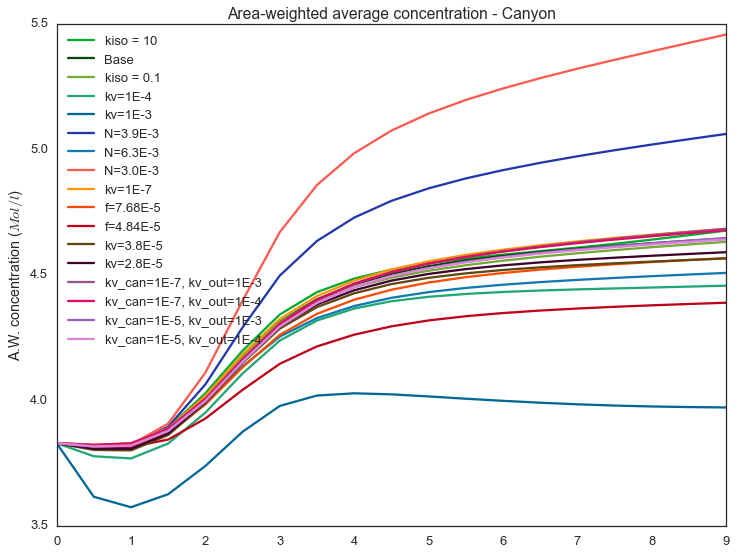

In [17]:
sns.set_context('talk', font_scale=1.0)


times = np.arange(19)/2.0

fig,(ax1) = plt.subplots(1, 1, figsize=(12, 9), sharex=True)

for ii in range(len(columns[2:])):
    ax1.plot(times,bottomConcCanyon[:,ii],label=labelsListCanyon[ii])
    
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )
    ax1.set_ylabel('A.W. concentration ($Mol/l$)')


ax1.legend(loc=0)    
plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


## Canyon effect

In [18]:
labelsListCanyon = ['kiso = 10',
                    'Base', 
                    'kiso = 0.1',
                    'kv=1E-4',
                    'kv=1E-3',
                    'N=3.9E-3',
                    'N=6.3E-3',
                    'N=3.0E-3',
                    'kv=1E-7',
                    'f=7.68E-5',
                    'f=4.84E-5',
                    'kv=3.8E-5',
                    'kv=2.8E-5',
                    'kv_can=1E-7, kv_out=1E-3',
                    'kv_can=1E-7, kv_out=1E-4',
                    'kv_can=1E-5, kv_out=1E-3',
                    'kv_can=1E-5, kv_out=1E-4',
]



In [19]:
df2.columns

Index([u'Unnamed: 0', u'day', u'ConcArea07', u'ConcArea22', u'ConcArea23', u'ConcArea24', u'ConcArea25', u'ConcArea26', u'ConcArea27', u'ConcArea28', u'ConcArea30'], dtype='object')

In [20]:
df.columns


Index([u'Unnamed: 0', u'day', u'ConcArea02', u'ConcArea03', u'ConcArea04', u'ConcArea11', u'ConcArea12', u'ConcArea14', u'ConcArea15', u'ConcArea16', u'ConcArea17', u'ConcArea18', u'ConcArea19', u'ConcArea20', u'ConcArea21', u'ConcArea3D04', u'ConcArea3D05', u'ConcArea3D06', u'ConcArea3D07'], dtype='object')

In [21]:
columns2


['Unnamed: 0',
 'day',
 'ConcArea07',
 'ConcArea22',
 'ConcArea23',
 'ConcArea24',
 'ConcArea25',
 'ConcArea26',
 'ConcArea27',
 'ConcArea28',
 'ConcArea30']

In [22]:
flatArray = np.empty((len(time),len(labelsListCanyon)))

flatArray[:,0] = bottomConcFlat[:,0]
flatArray[:,1] = bottomConcFlat[:,0]
flatArray[:,2] = bottomConcFlat[:,0]
flatArray[:,3] = bottomConcFlat[:,3]
flatArray[:,4] = bottomConcFlat[:,4]
flatArray[:,5] = bottomConcFlat[:,5]
flatArray[:,6] = bottomConcFlat[:,6]
flatArray[:,7] = bottomConcFlat[:,7]
flatArray[:,8] = bottomConcFlat[:,8]
flatArray[:,9] = bottomConcFlat[:,1]
flatArray[:,10] = bottomConcFlat[:,2]
flatArray[:,11] = bottomConcFlat[:,0]
flatArray[:,12] = bottomConcFlat[:,0]
flatArray[:,13] = bottomConcFlat[:,8]
flatArray[:,14] = bottomConcFlat[:,8]
flatArray[:,15] = bottomConcFlat[:,0]
flatArray[:,16] = bottomConcFlat[:,0]

labelsListFlatArray =['Base flat',
                    'Base flat', 
                    'Base flat',
                    'kv=1E-4',
                    'kv=1E-3',
                    'N=3.9E-3',
                    'N=6.3E-3',
                    'N=3.0E-3',
                    'kv=1E-7',
                    'f=7.68E-5',
                    'f=4.84E-5',
                    'Base flat',
                    'Base flat',
                    'kv=1E-7',
                    'kv=1E-7',
                    'Base flat',
                    'Base flat',
]

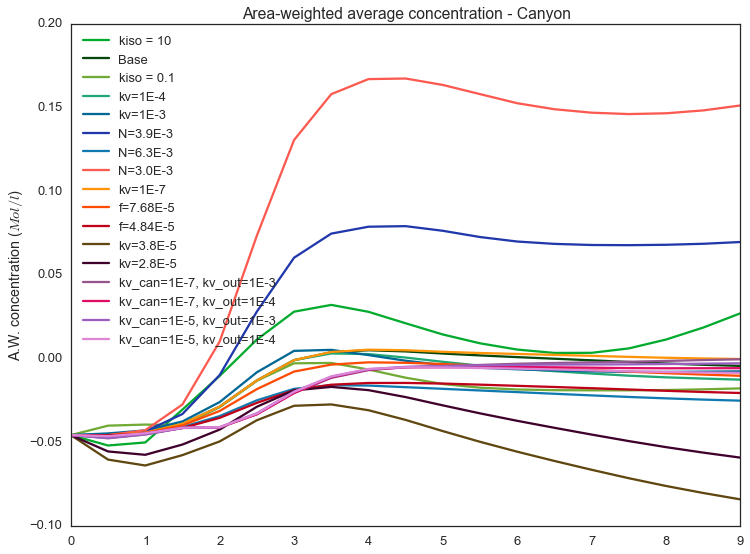

In [23]:
sns.set_context('talk', font_scale=1.0)

sns.set_palette(color_pal)

times = np.arange(19)/2.0

fig,(ax1) = plt.subplots(1, 1, figsize=(12, 9), sharex=True)

for ii in range(len(columns[2:])):
    ax1.plot(times,bottomConcCanyon[:,ii]-flatArray[:,ii],
             label=labelsListCanyon[ii])
    
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )
    ax1.set_ylabel('A.W. concentration ($Mol/l$)')


ax1.legend(loc=0)    
plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


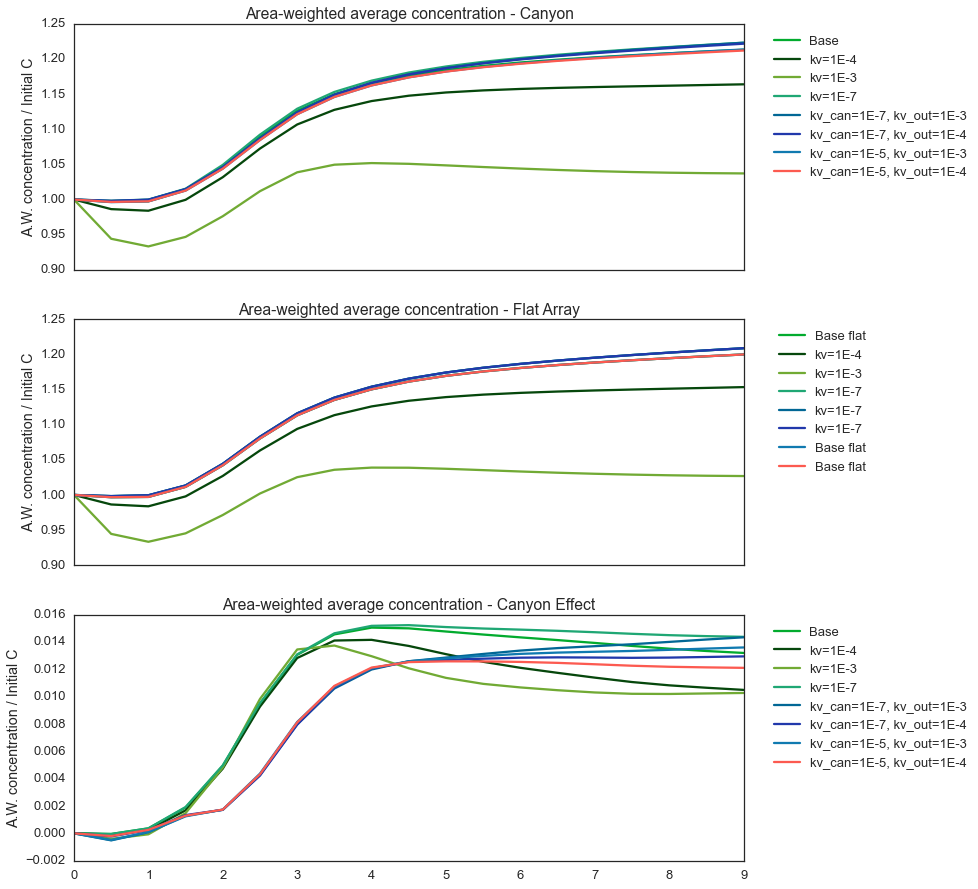

In [24]:

sns.set_context('talk', font_scale=1.0)

diffList = [1,3,4,8,13,14,15,16]

times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

for ii in diffList:
    ax1.plot(times,bottomConcCanyon[:,ii]/bottomConcCanyon[0,ii],label=labelsListCanyon[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )
    ax1.set_ylabel('A.W. concentration / Initial C')

    ax2.plot(times,flatArray[:,ii]/flatArray[0,ii],label=labelsListFlatArray[ii])
    ax2.set_aspect('auto')
    ax2.set_title('Area-weighted average concentration - Flat Array ' )
    ax2.set_ylabel('A.W. concentration / Initial C')

    ax3.plot(times,(bottomConcCanyon[:,ii]/bottomConcCanyon[0,ii])
             -(flatArray[:,ii]/flatArray[0,ii]),
             label=labelsListCanyon[ii]
            )
    ax3.set_aspect('auto')
    ax3.set_title('Area-weighted average concentration - Canyon Effect ' )
    ax3.set_ylabel('A.W. concentration / Initial C')

ax1.legend(loc ='upper right', bbox_to_anchor=(1.35,1))    
ax2.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax3.legend(loc ='upper right', bbox_to_anchor=(1.35,1))    

plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


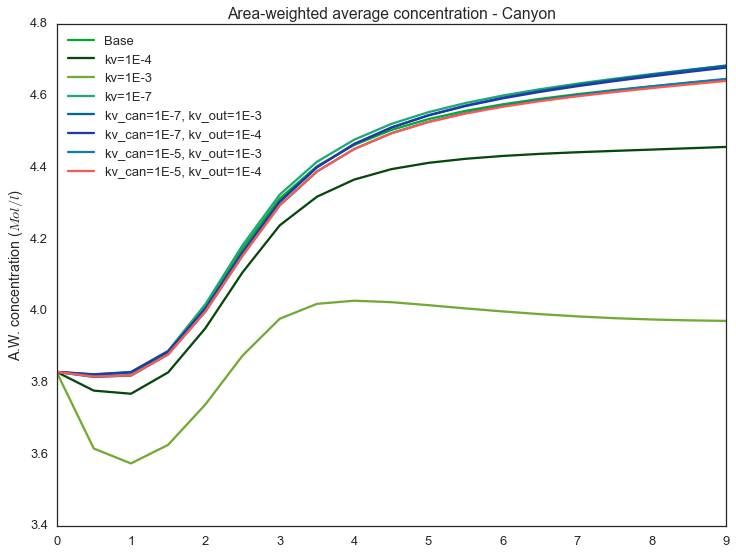

In [25]:
sns.set_palette(color_pal)

sns.set_context('talk', font_scale=1.0)

diffList = [1,3,4,8,13,14,15,16]

times = np.arange(19)/2.0

fig,(ax1) = plt.subplots(1, 1, figsize=(12, 9), sharex=True)

for ii in diffList:
    ax1.plot(times,bottomConcCanyon[:,ii],label=labelsListCanyon[ii])
    
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )
    ax1.set_ylabel('A.W. concentration ($Mol/l$)')


ax1.legend(loc=0)    
plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


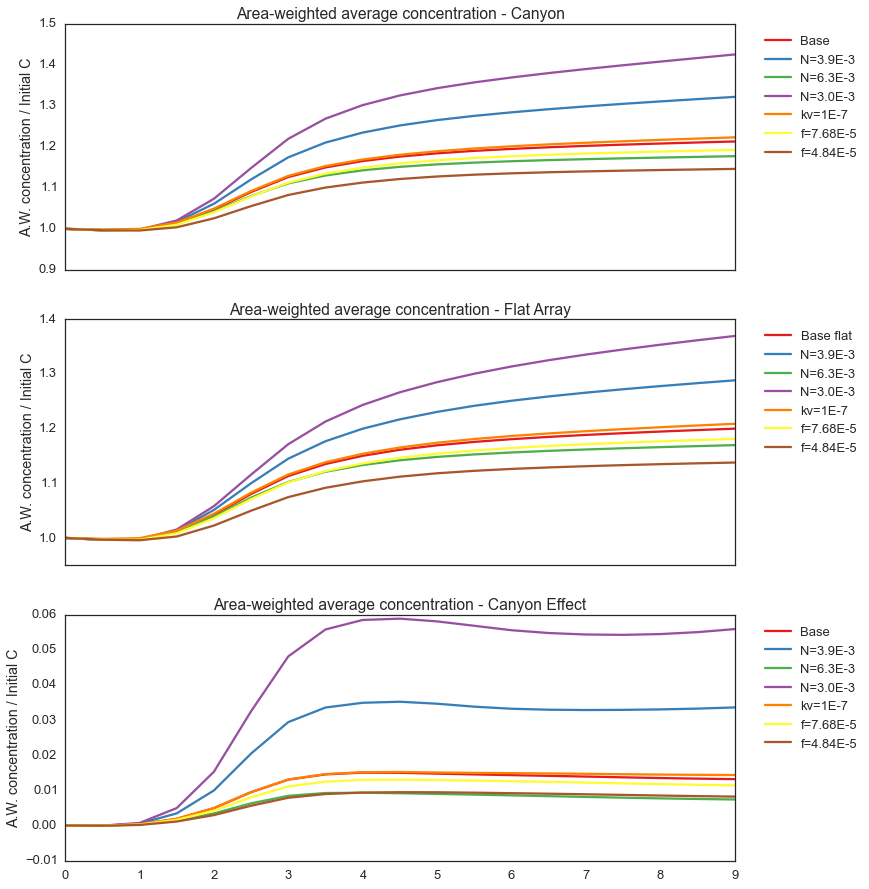

In [26]:
sns.set_palette('Set1',7)

sns.set_context('talk', font_scale=1.0)

diffList = [1,5,6,7,8,9,10]

times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

for ii in diffList:
    ax1.plot(times,bottomConcCanyon[:,ii]/bottomConcCanyon[0,ii],label=labelsListCanyon[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )
    ax1.set_ylabel('A.W. concentration / Initial C')

    ax2.plot(times,flatArray[:,ii]/flatArray[0,ii],label=labelsListFlatArray[ii])
    ax2.set_aspect('auto')
    ax2.set_title('Area-weighted average concentration - Flat Array ' )
    ax2.set_ylabel('A.W. concentration / Initial C')

    ax3.plot(times,(bottomConcCanyon[:,ii]/bottomConcCanyon[0,ii])
             -(flatArray[:,ii]/flatArray[0,ii]),
             label=labelsListCanyon[ii],
            )
    ax3.set_aspect('auto')
    ax3.set_title('Area-weighted average concentration - Canyon Effect ' )
    ax3.set_ylabel('A.W. concentration / Initial C')

ax1.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax2.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax3.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    

plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


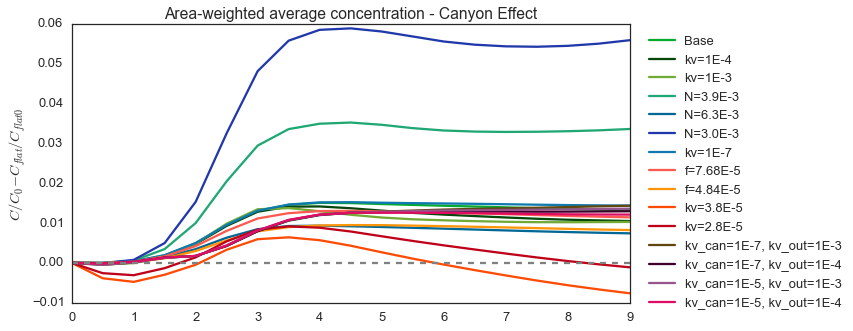

In [27]:
sns.set_palette(color_pal)

sns.set_context('talk', font_scale=1.0)

diffList = [1,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

times = np.arange(19)/2.0

fig,((ax1)) = plt.subplots(1, 1, figsize=(10, 5))

for ii in diffList:
    ax1.plot(times,(bottomConcCanyon[:,ii]/bottomConcCanyon[0,ii])-
             (flatArray[:,ii]/flatArray[0,ii]),label=labelsListCanyon[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon Effect ' )
    ax1.set_ylabel('$C/C_0-C_{flat}/C_{flat0}$')

ax1.axhline(0,linestyle = '--', color = '0.5')
ax1.legend(loc ='upper right', bbox_to_anchor=(1.40,1))    

plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


## BARKLEY experiments

In [29]:
fileCanyonBarkley = '../results/metricsDataFrames/bottomConcentrationAreaCanyonRunsBarkley.csv'


labelsListCanyonBar = ['Linear',
                    'Salt',
                    'Oxygen',
                    'Nitrate',
                    'Silicate',
                    'Phosphate',
                    'Nitrous_Acid',
                    'Methane',
]

labelsListFlatBar = ['Linear',
                    'Salt',
                    'Oxygen',
                    'Nitrate',
                    'Silicate',
                    'Phosphate',
                    'Nitrous_Acid',
                    'Methane',
]

dfBar = pd.read_csv(fileCanyonBarkley)
columns = dfBar.columns.values.tolist()

#time = dfBar['time']

bottomConcCanyonBar = np.empty((len(time),len(columns[2:])))

ii=0

for col in columns[2:]:
    
    bottomConcCanyonBar[:,ii] = dfBar[col] 
    ii=ii+1


In [30]:
fileFlatBarkley = '../results/metricsDataFrames/bottomConcentrationAreaFlatRunsBarkley.csv'

dfBarNoC = pd.read_csv(fileFlatBarkley)
columns = dfBarNoC.columns.values.tolist()

#time = dfBarNoC['time']

bottomConcFlatBar = np.empty((len(time),len(columns[2:])))

ii=0

for col in columns[2:]:
    
    bottomConcFlatBar[:,ii] = dfBarNoC[col] 
    ii=ii+1
  

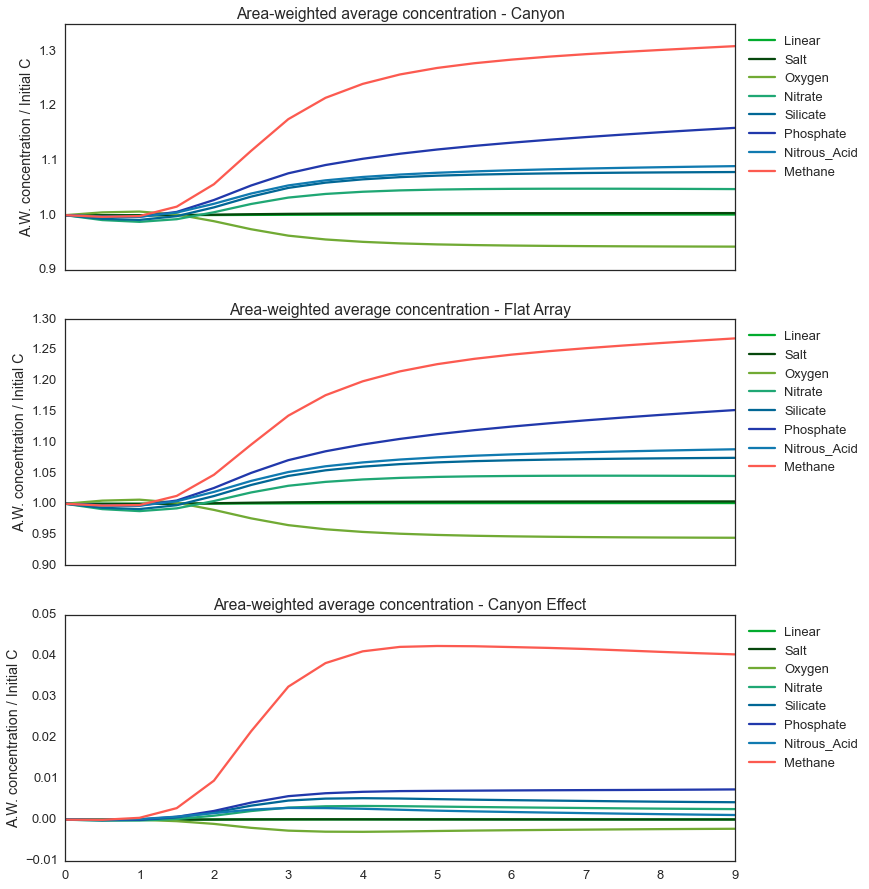

In [31]:
sns.set_palette(color_pal)

sns.set_context('talk', font_scale=1.0)

diffList = [1,3,4,8,13,14,15,16]

times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

for ii in range(8):
    ax1.plot(times,bottomConcCanyonBar[:,ii]/bottomConcCanyonBar[0,ii],label=labelsListCanyonBar[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )
    ax1.set_ylabel('A.W. concentration / Initial C')

    ax2.plot(times,bottomConcFlatBar[:,ii]/bottomConcFlatBar[0,ii],label=labelsListFlatBar[ii])
    ax2.set_aspect('auto')
    ax2.set_title('Area-weighted average concentration - Flat Array ' )
    ax2.set_ylabel('A.W. concentration / Initial C')

    ax3.plot(times,
             (bottomConcCanyonBar[:,ii]/bottomConcCanyonBar[0,ii])
             -(bottomConcFlatBar[:,ii]/bottomConcFlatBar[0,ii]),
             label=labelsListCanyonBar[ii]
            )
    
    ax3.set_aspect('auto')
    ax3.set_title('Area-weighted average concentration - Canyon Effect ' )
    ax3.set_ylabel('A.W. concentration / Initial C')

ax1.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax2.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax3.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    

plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


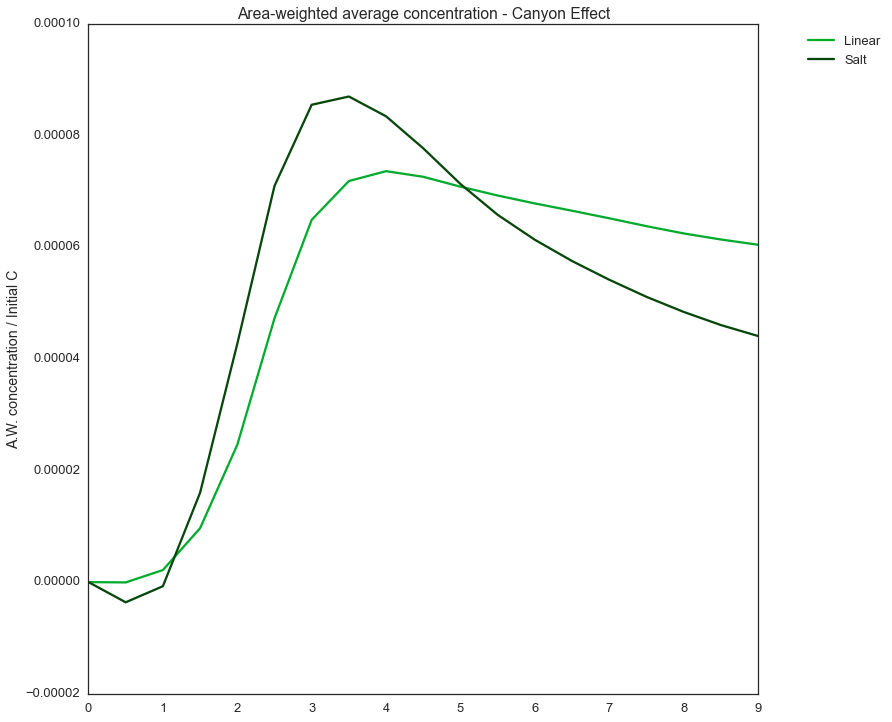

In [32]:
sns.set_palette(color_pal)

sns.set_context('talk', font_scale=1.0)


times = np.arange(19)/2.0

fig,((ax3)) = plt.subplots(1, 1, figsize=(12, 12), sharex=True)

for ii in [0,1]:
    
    ax3.plot(times,
             (bottomConcCanyonBar[:,ii]/bottomConcCanyonBar[0,ii])
             -(bottomConcFlatBar[:,ii]/bottomConcFlatBar[0,ii]),
             label=labelsListCanyonBar[ii]
            )
    
    ax3.set_aspect('auto')
    ax3.set_title('Area-weighted average concentration - Canyon Effect ' )
    ax3.set_ylabel('A.W. concentration / Initial C')
    
ax3.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    

plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


## Plots for talks

In [33]:

colors = ["kelly green","forest green","leaf","jade","navy blue","sapphire","nice blue",
          "red orange","tangerine","purplish","cerise","amethyst","lavender pink","blue",
          "purple","orange","gold","red","magenta"]

colors_bar = ["kelly green","blue","purple","orange","gold","red","magenta"]

color_pal_all = sns.xkcd_palette(colors)

colors_Diff = ["kelly green","forest green","leaf","jade","navy blue","sapphire","nice blue",
          "red orange","tangerine","purplish","cerise","amethyst","lavender pink"]

color_pal_Diff = sns.xkcd_palette(colors_Diff)



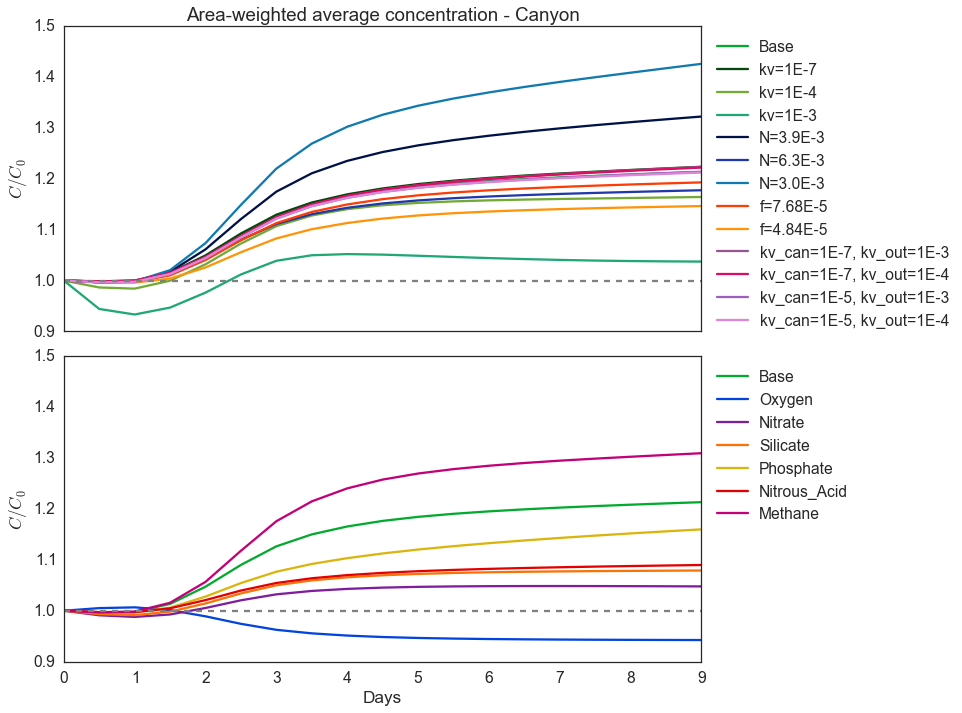

In [34]:

sns.set_palette(color_pal_all)
sns.set_context('talk', font_scale=1.2)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]

times = np.arange(19)/2.0

fig,((ax1),(ax2)) = plt.subplots(2, 1, figsize=(10, 10), sharex=True, sharey=True)

for ii in diffList:
    ax1.plot(times,bottomConcCanyon[:,ii]/bottomConcCanyon[0,ii],label=labelsListCanyon[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )

ax1.set_ylabel('$C/C_0$')


ax1.legend(loc ='upper right', bbox_to_anchor=(1.41,1))    
ax1.axhline(1,linestyle = '--', color = '0.5')

#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/BotConcNfKv3D.pdf', format='pdf', dpi=1000, bbox_inches='tight')


diffListbar = [2,3,4,5,6,7]

times = np.arange(19)/2.0


ax2.plot(times,bottomConcCanyon[:,1]/bottomConcCanyon[0,1],label=labelsListCanyon[1],
         color=sns.xkcd_rgb[colors_bar[0]])
jj = 1
for ii in diffListbar:
    ax2.plot(times,bottomConcCanyonBar[:,ii]/bottomConcCanyonBar[0,ii],
             label=labelsListCanyonBar[ii],color=sns.xkcd_rgb[colors_bar[jj]])
    jj = jj +1
ax2.set_aspect('auto')
ax2.set_title(' ' )
ax2.set_ylabel('$C/C_0$')
ax2.set_xlabel('Days')

ax2.axhline(1,linestyle = '--', color = '0.5')

ax2.legend(loc ='upper right', bbox_to_anchor=(1.25,1))    

plt.tight_layout()

plt.show()


#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/BottConcAll.pdf', format='pdf', dpi=1000, bbox_inches='tight')


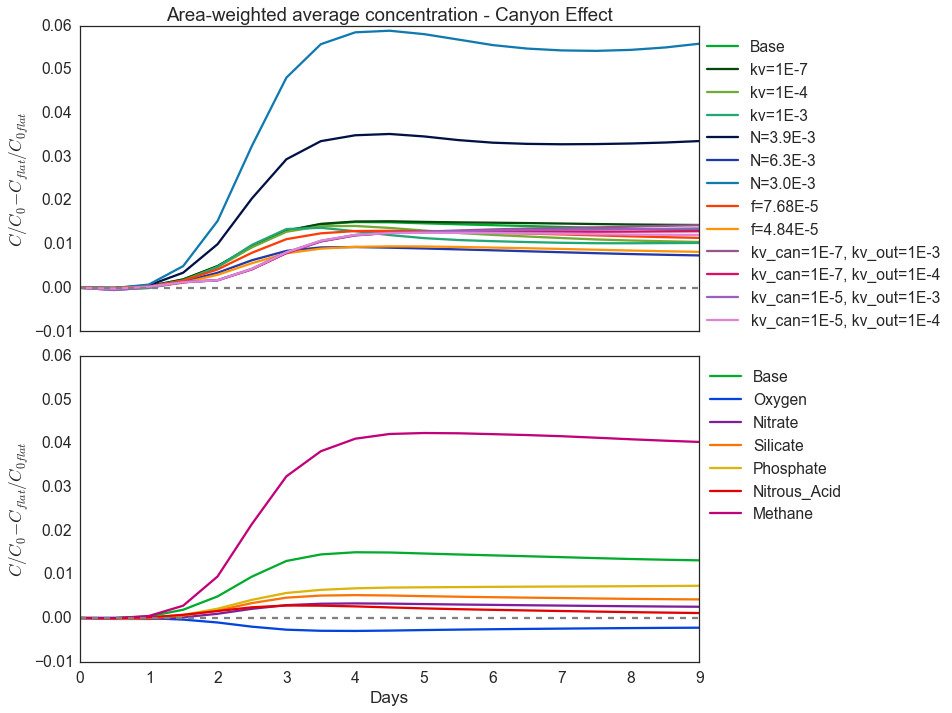

In [35]:
sns.set_palette(color_pal_all)
sns.set_context('talk', font_scale=1.2)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]

times = np.arange(19)/2.0

fig,((ax1),(ax2)) = plt.subplots(2, 1, figsize=(10, 10), sharex=True, sharey=True)

for ii in diffList:
    ax1.plot(times,(bottomConcCanyon[:,ii]/bottomConcCanyon[0,ii])
             -(flatArray[:,ii]/flatArray[0,ii]),
             label=labelsListCanyon[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon Effect ' )

ax1.set_ylabel('$C/C_0-C_{flat}/C_{0flat}$')


ax1.legend(loc ='upper right', bbox_to_anchor=(1.41,1))    
ax1.axhline(0,linestyle = '--', color = '0.5')

#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/BotConcNfKv3D.pdf', format='pdf', dpi=1000, bbox_inches='tight')


diffListbar = [2,3,4,5,6,7]

times = np.arange(19)/2.0


ax2.plot(times,(bottomConcCanyon[:,1]/bottomConcCanyon[0,1])
         -(flatArray[:,1]/flatArray[0,1]),label=labelsListCanyon[1],
         color=sns.xkcd_rgb[colors_bar[0]])
jj = 1
for ii in diffListbar:
    ax2.plot(times,(bottomConcCanyonBar[:,ii]/bottomConcCanyonBar[0,ii])
             -(bottomConcFlatBar[:,ii]/bottomConcFlatBar[0,ii]),
             label=labelsListCanyonBar[ii],color=sns.xkcd_rgb[colors_bar[jj]])
    jj = jj +1
ax2.set_aspect('auto')
ax2.set_title(' ' )
ax2.set_ylabel('$C/C_0-C_{flat}/C_{0flat}$')
ax2.set_xlabel('Days')

ax2.axhline(0,linestyle = '--', color = '0.5')

ax2.legend(loc ='upper right', bbox_to_anchor=(1.25,1))    

plt.tight_layout()

plt.show()


#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/BottConcEffectAll.pdf', format='pdf', dpi=1000, bbox_inches='tight')


0.212933215761
0.222990185315
0.163815051406
0.03713584883
0.321641857357
0.177072596065
0.425029609734
0.192492999097
0.146044851048
0.222955252519
0.221561707915
0.21333474853
0.211843514845
-0.0575007822068
0.0476900661553
0.0788415504544
0.1595557743
0.0896367077094
0.308943826009


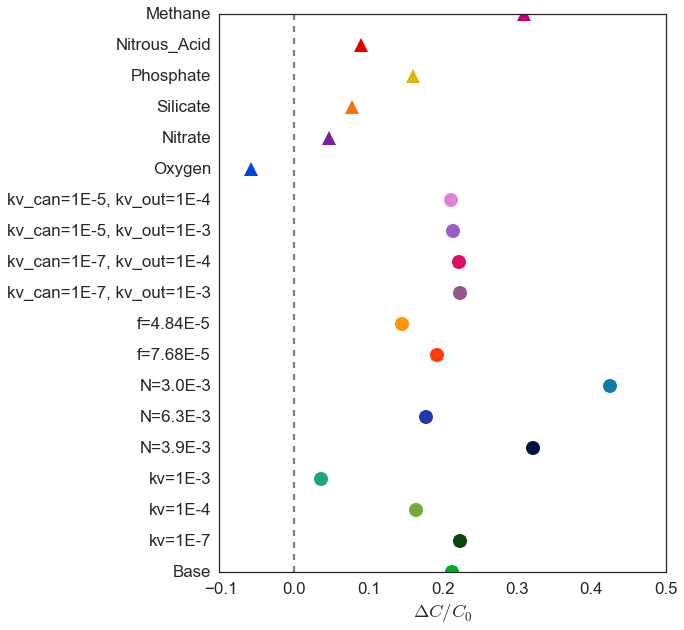

In [36]:
color_pal_all = sns.xkcd_palette(colors)

sns.set_palette(color_pal_all)

sns.set_context('talk', font_scale=1.3)

diffListBar = [2,3,4,5,6,7]
diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]

times = np.arange(19)/2.0

fig,((ax1)) = plt.subplots(1, 1, figsize=(8, 10))

#jj = 0
#for ii in diffList:
#    ax1.plot(((bottomConcCanyon[9,ii]-bottomConcCanyon[0,ii])/(bottomConcCanyon[0,ii])),jj, 
#             'o',markersize=14,alpha=0.5,
#            label=labelsListCanyon[ii])
#    print((bottomConcCanyon[9,ii]-bottomConcCanyon[0,ii])/bottomConcCanyon[0,ii])
#    jj = jj + 1
##4.5 is the nondim time taking a day as characteristic scale for time

#for ii in diffListBar:
#    ax1.plot(((bottomConcCanyonBar[9,ii]-bottomConcCanyonBar[0,ii])/bottomConcCanyonBar[0,ii]),jj,
#             '^',markersize=14,alpha=0.5,
#            label=labelsListCanyonBar[ii])
#    print((bottomConcCanyonBar[9,ii]-bottomConcCanyonBar[0,ii])/bottomConcCanyonBar[0,ii])
#    jj = jj + 1
#    ax1.set_aspect('auto')
#    ax1.set_title(' ' )
#    ax1.set_xlabel('$\Delta C $')
    
#my_yticks = [labelsListCanyon[1],
#             labelsListCanyon[8],
#             labelsListCanyon[3],
#             labelsListCanyon[4],
#             labelsListCanyon[5],
#             labelsListCanyon[6],
#             labelsListCanyon[7],
#             labelsListCanyon[9],
#             labelsListCanyon[10],
#             labelsListCanyon[13],
#             labelsListCanyon[14],
#             labelsListCanyon[15],
#             labelsListCanyon[16],
#             labelsListCanyonBar[2],
#             labelsListCanyonBar[3],
#             labelsListCanyonBar[4],
#             labelsListCanyonBar[5],
#             labelsListCanyonBar[6],
#             labelsListCanyonBar[7]]



#-------------------------------------------------------------------------------------
jj = 0
for ii in diffList:
    ax1.plot(((bottomConcCanyon[18,ii]-bottomConcCanyon[0,ii])/(bottomConcCanyon[0,ii])),jj,
             'o',markersize=14,
            label=labelsListCanyon[ii])
    print((bottomConcCanyon[18,ii]-bottomConcCanyon[0,ii])/bottomConcCanyon[0,ii])
    jj = jj + 1


for ii in diffListBar:
    ax1.plot(((bottomConcCanyonBar[18,ii]-bottomConcCanyonBar[0,ii])/bottomConcCanyonBar[0,ii]),jj,
             '^',markersize=14,
            label=labelsListCanyonBar[ii])
    print((bottomConcCanyonBar[18,ii]-bottomConcCanyonBar[0,ii])/bottomConcCanyonBar[0,ii])
    jj = jj + 1
    ax1.set_aspect('auto')
    
    ax1.set_xlabel('$\Delta C /C_0 $')
    
my_yticks = [labelsListCanyon[1],
             labelsListCanyon[8],
             labelsListCanyon[3],
             labelsListCanyon[4],
             labelsListCanyon[5],
             labelsListCanyon[6],
             labelsListCanyon[7],
             labelsListCanyon[9],
             labelsListCanyon[10],
             labelsListCanyon[13],
             labelsListCanyon[14],
             labelsListCanyon[15],
             labelsListCanyon[16],
             labelsListCanyonBar[2],
             labelsListCanyonBar[3],
             labelsListCanyonBar[4],
             labelsListCanyonBar[5],
             labelsListCanyonBar[6],
             labelsListCanyonBar[7]]
plt.yticks(range(19), my_yticks, rotation=0)

#ax1.legend(loc ='upper right', bbox_to_anchor=(1.40,1))    
ax1.axvline(0,linestyle = '--', color = '0.5')

#
plt.tight_layout

plt.show()

#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/ConcentrationFluxAllUpwelling.pdf', format='pdf', dpi=1000, bbox_inches='tight')


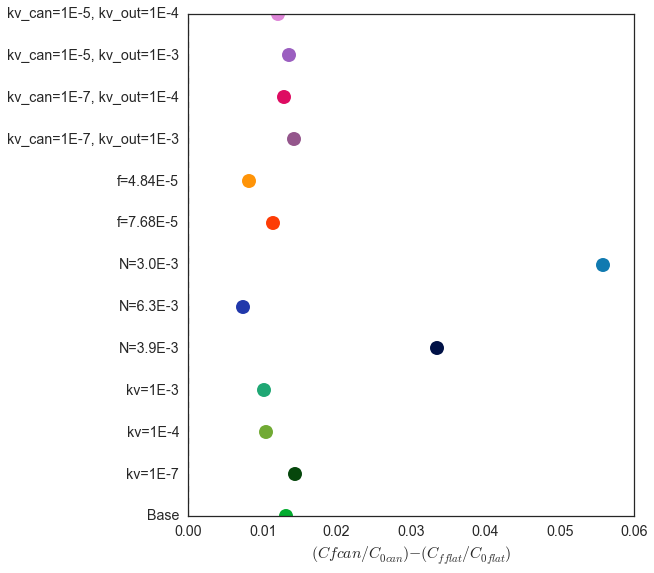

In [37]:
color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.1)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1)) = plt.subplots(1, 1, figsize=(8, 9))


jj = 0
for ii in diffList:
    ax1.plot((bottomConcCanyon[18,ii]/bottomConcCanyon[0,ii])
             -(flatArray[18,ii]/flatArray[0,ii]),jj,
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1


    ax1.set_aspect('auto')
    
    ax1.set_xlabel('$(C{fcan}/C_{0can})-(C_{fflat}/C_{0flat}) $')
    
my_yticks = [labelsListCanyon[1],
             labelsListCanyon[8],
             labelsListCanyon[3],
             labelsListCanyon[4],
             labelsListCanyon[5],
             labelsListCanyon[6],
             labelsListCanyon[7],
             labelsListCanyon[9],
             labelsListCanyon[10],
             labelsListCanyon[13],
             labelsListCanyon[14],
             labelsListCanyon[15],
             labelsListCanyon[16]]
plt.yticks(range(13), my_yticks, rotation=0)

#ax1.legend(loc ='upper right', bbox_to_anchor=(1.40,1))    
ax1.axvline(0,linestyle = '--', color = '0.5')

#
plt.tight_layout

plt.show()

#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/ConcentrationFluxAllUpwelling.pdf', format='pdf', dpi=1000, bbox_inches='tight')


In [68]:
fvector = np.array([9.66E-5,9.66E-5,9.66E-5,
                    9.66E-5,9.66E-5,9.66E-5,
                    9.66E-5,7.68E-5,4.84E-5,
                    9.66E-5,9.66E-5,9.66E-5,9.66E-5])

Nvector = np.array([5.5E-3,5.5E-3,5.5E-3,
                    5.5E-3,3.9E-3,6.3E-3,
                    3.0E-3,5.5E-3,5.5E-3,
                    5.5E-3,5.5E-3,5.5E-3,5.5E-3])

Kv = np.array([1E-5,1E-7,1E-4,
               1E-3,1E-5,1E-5,
               1E-5,1E-5,1E-5,
               1E-7,1E-7,1E-5,1E-5,])

Hs = 152.5 # m
W = 8300.0 # m
T = 3600.0 # s timescale for diffusion
L = 6400.0 # m Canyon length
A = L*W # Scale for canyon area i just made up. About size of high concentration region
Z = 10.0 # m scale for depth of blob of HCW
U = 0.18 # m/s shelf current

Pe = (L*Kv)/(U*(Z*Z))

Bu = (Nvector*Hs)/(fvector*W)
DiffBu = (Nvector*Hs*Kv)/(fvector)

Xi = (Kv*Nvector)/((fvector**2)*(L**2)) 


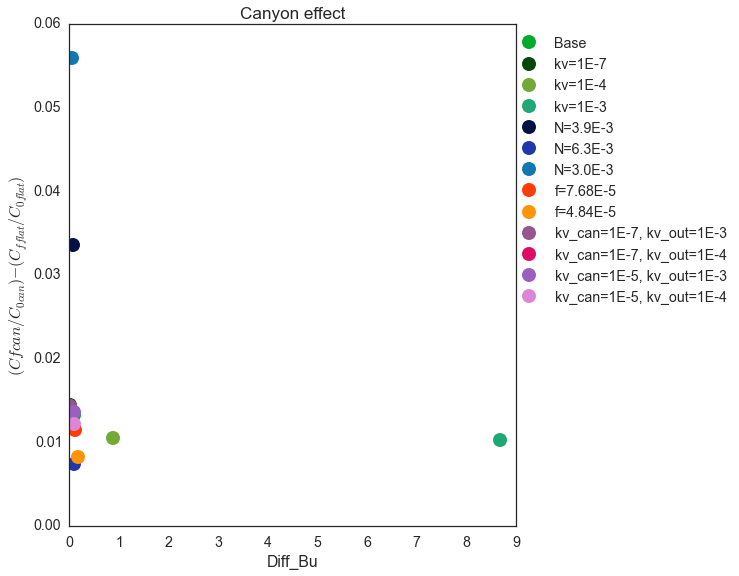

In [39]:
color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.1)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1)) = plt.subplots(1, 1, figsize=(8, 9))


jj = 0
for ii in diffList:
    ax1.plot(DiffBu[jj],(bottomConcCanyon[18,ii]/bottomConcCanyon[0,ii])
             -(flatArray[18,ii]/flatArray[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1


ax1.set_aspect('auto')

ax1.set_title('Canyon effect')
    
ax1.set_ylabel('$(C{fcan}/C_{0can})-(C_{fflat}/C_{0flat}) $')
    
ax1.set_xlabel('Diff_Bu')

ax1.legend(loc ='upper right', bbox_to_anchor=(1.50,1))    

plt.tight_layout

plt.show()

#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/ConcentrationFluxAllUpwelling.pdf', format='pdf', dpi=1000, bbox_inches='tight')


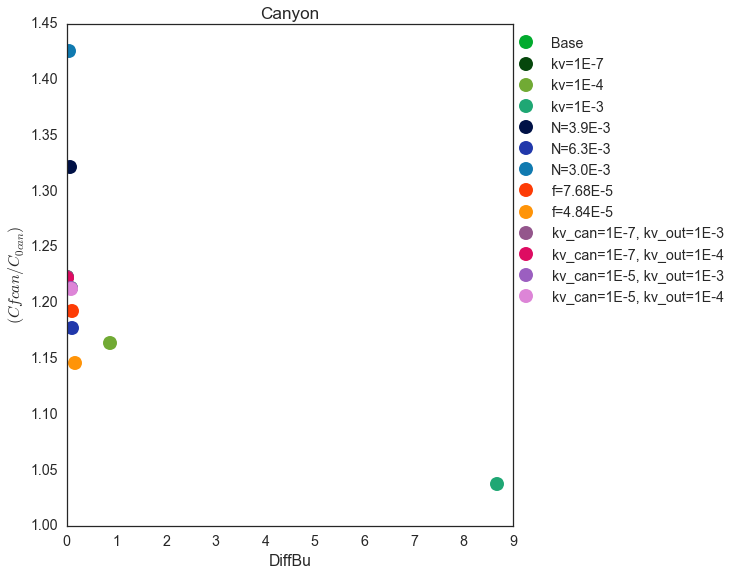

In [40]:
color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.1)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1)) = plt.subplots(1, 1, figsize=(8, 9))


jj = 0
for ii in diffList:
    ax1.plot(DiffBu[jj],(bottomConcCanyon[18,ii]/bottomConcCanyon[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1

#ax1.set_xscale("log", nonposy='clip')

ax1.set_aspect('auto')
    
ax1.set_title('Canyon')

ax1.set_ylabel('$(C{fcan}/C_{0can}) $')
    
ax1.set_xlabel('DiffBu')

ax1.legend(loc ='upper right', bbox_to_anchor=(1.50,1))    

plt.tight_layout

plt.show()

#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/ConcentrationFluxAllUpwelling.pdf', format='pdf', dpi=1000, bbox_inches='tight')


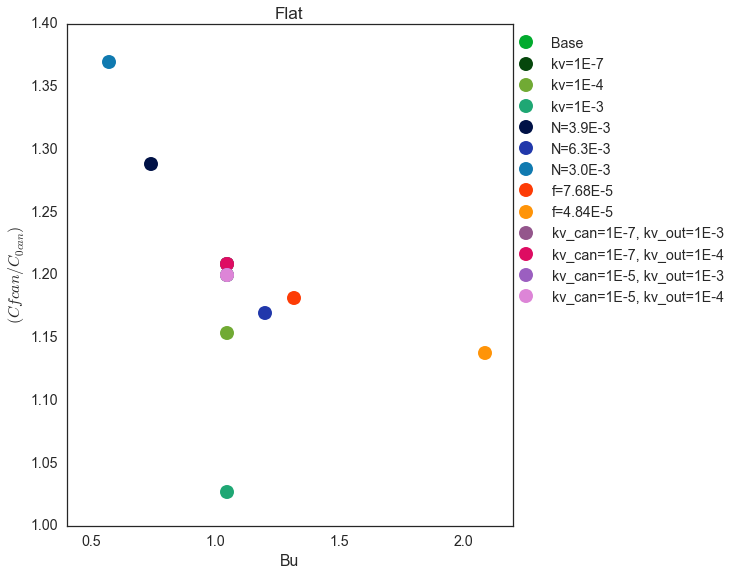

In [41]:
color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.1)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1)) = plt.subplots(1, 1, figsize=(8, 9))


jj = 0
for ii in diffList:
    ax1.plot(Bu[jj],(flatArray[18,ii]/flatArray[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1


ax1.set_aspect('auto')

ax1.set_title('Flat')
    
ax1.set_ylabel('$(C{fcan}/C_{0can}) $')
    
ax1.set_xlabel('Bu')

ax1.legend(loc ='upper right', bbox_to_anchor=(1.50,1))    

plt.tight_layout

plt.show()

#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/ConcentrationFluxAllUpwelling.pdf', format='pdf', dpi=1000, bbox_inches='tight')


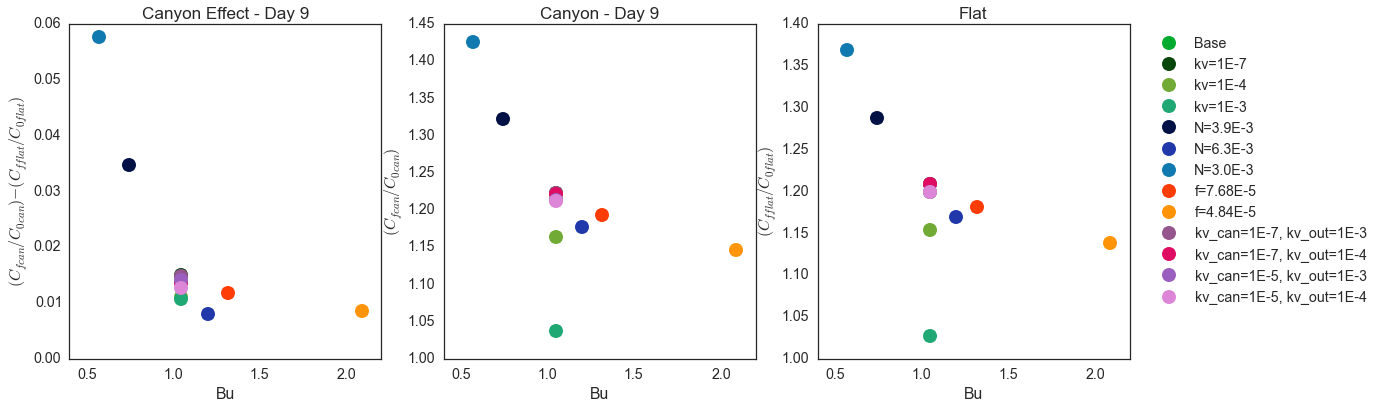

In [66]:
color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.1)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(19, 6))


jj = 0
for ii in diffList:
    ax1.plot(Bu[jj],(bottomConcCanyon[18,ii]/bottomConcCanyon[0,ii])
             -(flatArrayDns[18,ii]/flatArrayDns[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1

jj = 0
for ii in diffList:
    ax2.plot(Bu[jj],(bottomConcCanyon[18,ii]/bottomConcCanyon[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1

jj = 0
for ii in diffList:
    ax3.plot(Bu[jj],(flatArray[18,ii]/flatArray[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1



ax2.set_title('Canyon - Day 9')
ax1.set_title('Canyon Effect - Day 9')
ax3.set_title('Flat')
    
ax1.set_ylabel('$(C_{fcan}/C_{0can})-(C_{fflat}/C_{0flat}) $')
ax2.set_ylabel('$(C_{fcan}/C_{0can}) $')
ax3.set_ylabel('$(C_{fflat}/C_{0flat}) $')
    
ax1.set_xlabel('Bu')
ax2.set_xlabel('Bu')
ax3.set_xlabel('Bu')

ax3.legend(loc ='upper right', bbox_to_anchor=(1.80,1))    

plt.tight_layout

plt.show()

fig.savefig('/home/kramosmu/Documents/CommitteeMeeting2016/Figures/BAC_vs_Bu.pdf', format='pdf', dpi=1000, bbox_inches='tight')


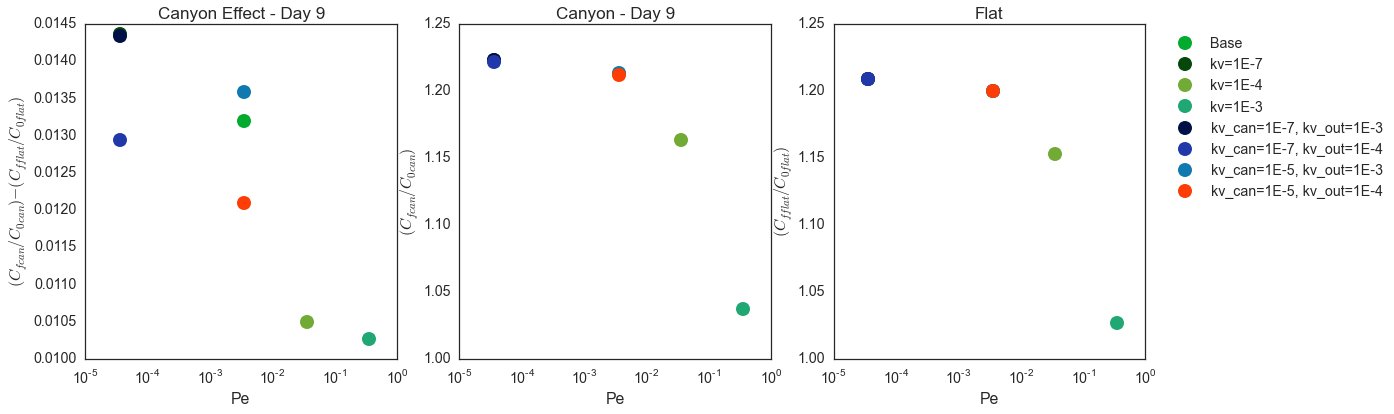

In [73]:
color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.1)

DiffCasesList = [1,8,3,4,13,14,15,16]
PeList = [0,1,2,3,9,10,11,12]

times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(19, 6))



for ii,kk in zip(DiffCasesList,PeList):
    
    ax1.plot(Pe[kk],((bottomConcCanyon[18,ii]/bottomConcCanyon[0,ii])
          -(flatArray[18,ii]/flatArray[0,ii])),'o',markersize=14,
            label=labelsListCanyon[ii])
    
for ii,kk in zip(DiffCasesList,PeList):
    ax2.plot(Pe[kk],(bottomConcCanyon[18,ii]/bottomConcCanyon[0,ii]),'o',markersize=14,label=labelsListCanyon[ii])
    
for ii,kk in zip(DiffCasesList,PeList):
    ax3.plot(Pe[kk],(flatArray[18,ii]/flatArray[0,ii]),'o',markersize=14,label=labelsListCanyon[ii])
    



ax2.set_title('Canyon - Day 9')
ax1.set_title('Canyon Effect - Day 9')
ax3.set_title('Flat')
    
ax1.set_ylabel('$(C_{fcan}/C_{0can})-(C_{fflat}/C_{0flat}) $')
ax2.set_ylabel('$(C_{fcan}/C_{0can}) $')
ax3.set_ylabel('$(C_{fflat}/C_{0flat}) $')
ax1.set_xlabel('Pe')    
ax2.set_xlabel('Pe')
ax3.set_xlabel('Pe')
ax1.set_xscale("log", nonposx='clip')
ax2.set_xscale("log", nonposx='clip')
ax3.set_xscale("log", nonposx='clip')

ax3.legend(loc ='upper right', bbox_to_anchor=(1.80,1))    

plt.tight_layout

plt.show()

fig.savefig('/home/kramosmu/Documents/CommitteeMeeting2016/Figures/BAC_vs_Pe_log.pdf', format='pdf', dpi=1000, bbox_inches='tight')


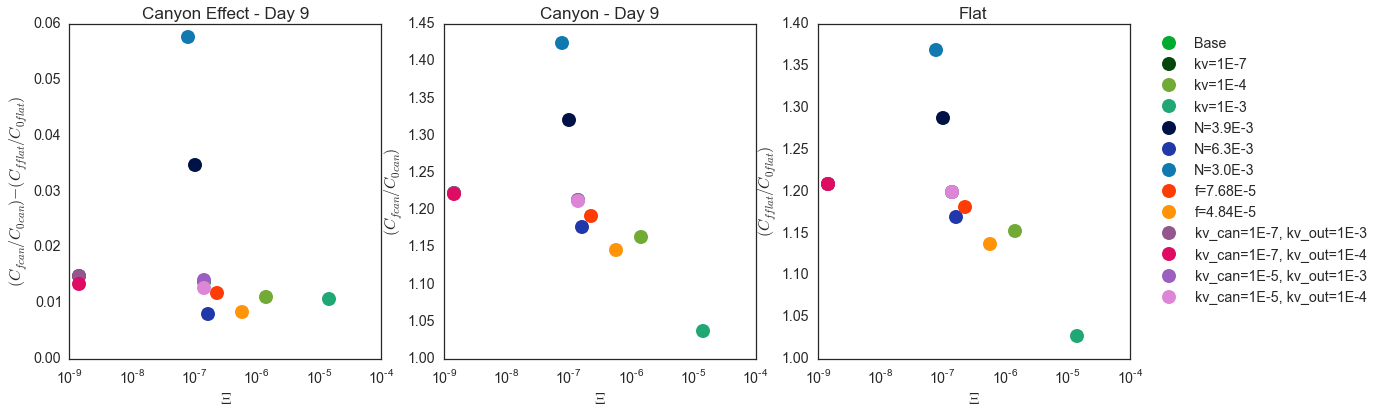

In [72]:
color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.1)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(19, 6))


jj = 0
for ii in diffList:
    ax1.plot(Xi[jj],(bottomConcCanyon[18,ii]/bottomConcCanyon[0,ii])
             -(flatArrayDns[18,ii]/flatArrayDns[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1

jj = 0
for ii in diffList:
    ax2.plot(Xi[jj],(bottomConcCanyon[18,ii]/bottomConcCanyon[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1

jj = 0
for ii in diffList:
    ax3.plot(Xi[jj],(flatArray[18,ii]/flatArray[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1



ax2.set_title('Canyon - Day 9')
ax1.set_title('Canyon Effect - Day 9')
ax3.set_title('Flat')
    
ax1.set_ylabel('$(C_{fcan}/C_{0can})-(C_{fflat}/C_{0flat}) $')
ax2.set_ylabel('$(C_{fcan}/C_{0can}) $')
ax3.set_ylabel('$(C_{fflat}/C_{0flat}) $')
    
ax1.set_xlabel('$\Xi$')
ax2.set_xlabel('$\Xi$')
ax3.set_xlabel('$\Xi$')
ax1.set_xscale("log", nonposx='clip')
ax2.set_xscale("log", nonposx='clip')
ax3.set_xscale("log", nonposx='clip')


ax3.legend(loc ='upper right', bbox_to_anchor=(1.80,1))    

plt.tight_layout

plt.show()

fig.savefig('/home/kramosmu/Documents/CommitteeMeeting2016/Figures/BAC_vs_Xi_log.pdf', format='pdf', dpi=1000, bbox_inches='tight')


## Smaller Shelf Area

In [47]:
fileCanyonDns = '../results/metricsDataFrames/bottomConcentrationAreaFiltCanyonRuns_DnStream.csv'

df = pd.read_csv(fileCanyonDns)
columns = df.columns.values.tolist()

time = df['day']

bottomConcCanyonDns = np.empty((len(time),len(columns[2:])))

ii=0

for col in columns[2:]:
    
    bottomConcCanyonDns[:,ii] = df[col] 
    ii=ii+1


In [48]:
fileFlatDns = '../results/metricsDataFrames/bottomConcentrationAreaFiltFlatRuns_DnStream.csv'

df2 = pd.read_csv(fileFlatDns)
columns2 = df2.columns.values.tolist()

time2 = df2['day']

bottomConcFlatDns = np.empty((len(time2),len(columns2[2:])))

ii=0
for col in columns2[2:]:
    bottomConcFlatDns[:,ii] = df2[col] 
    ii=ii+1



In [49]:
flatArrayDns = np.empty((len(time),len(labelsListCanyon)))

flatArrayDns[:,0] = bottomConcFlatDns[:,0]
flatArrayDns[:,1] = bottomConcFlatDns[:,0]
flatArrayDns[:,2] = bottomConcFlatDns[:,0]
flatArrayDns[:,3] = bottomConcFlatDns[:,3]
flatArrayDns[:,4] = bottomConcFlatDns[:,4]
flatArrayDns[:,5] = bottomConcFlatDns[:,5]
flatArrayDns[:,6] = bottomConcFlatDns[:,6]
flatArrayDns[:,7] = bottomConcFlatDns[:,7]
flatArrayDns[:,8] = bottomConcFlatDns[:,8]
flatArrayDns[:,9] = bottomConcFlatDns[:,1]
flatArrayDns[:,10] = bottomConcFlatDns[:,2]
flatArrayDns[:,11] = bottomConcFlatDns[:,0]
flatArrayDns[:,12] = bottomConcFlatDns[:,0]
flatArrayDns[:,13] = bottomConcFlatDns[:,8]
flatArrayDns[:,14] = bottomConcFlatDns[:,8]
flatArrayDns[:,15] = bottomConcFlatDns[:,0]
flatArrayDns[:,16] = bottomConcFlatDns[:,0]

labelsListflatArrayDns =['Base flat',
                    'Base flat', 
                    'Base flat',
                    'kv=1E-4',
                    'kv=1E-3',
                    'N=3.9E-3',
                    'N=6.3E-3',
                    'N=3.0E-3',
                    'kv=1E-7',
                    'f=7.68E-5',
                    'f=4.84E-5',
                    'Base flat',
                    'Base flat',
                    'kv=1E-7',
                    'kv=1E-7',
                    'Base flat',
                    'Base flat',
]

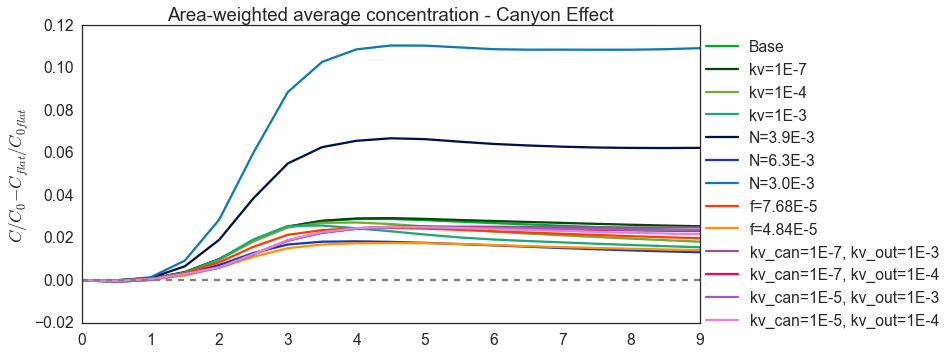

In [50]:
sns.set_palette(color_pal_all)
sns.set_context('talk', font_scale=1.2)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]

times = np.arange(19)/2.0

fig,((ax1)) = plt.subplots(1, 1, figsize=(10, 5), sharex=True, sharey=True)

for ii in diffList:
    ax1.plot(times,(bottomConcCanyonDns[:,ii]/bottomConcCanyonDns[0,ii])
             -(flatArrayDns[:,ii]/flatArrayDns[0,ii]),
             label=labelsListCanyon[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon Effect ' )

ax1.set_ylabel('$C/C_0-C_{flat}/C_{0flat}$')


ax1.legend(loc ='upper right', bbox_to_anchor=(1.41,1))    
ax1.axhline(0,linestyle = '--', color = '0.5')

#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/BotConcNfKv3D.pdf', format='pdf', dpi=1000, bbox_inches='tight')

plt.tight_layout()

plt.show()


#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/BottConcEffectAll.pdf', format='pdf', dpi=1000, bbox_inches='tight')


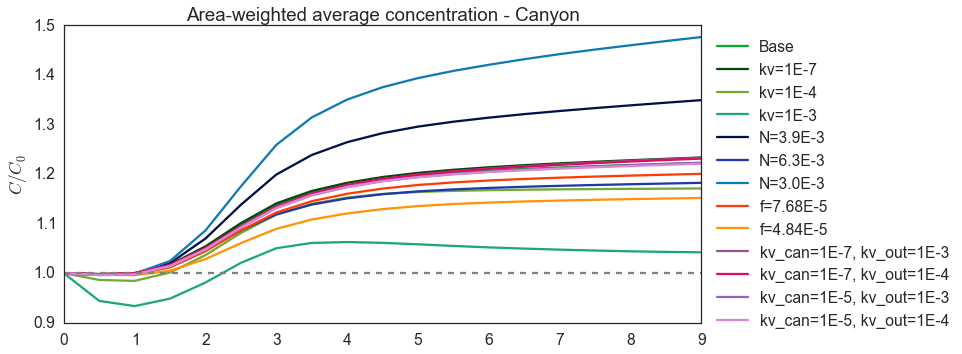

In [51]:
sns.set_palette(color_pal_all)
sns.set_context('talk', font_scale=1.2)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]

times = np.arange(19)/2.0

fig,((ax1)) = plt.subplots(1, 1, figsize=(10, 5), sharex=True, sharey=True)

for ii in diffList:
    ax1.plot(times,(bottomConcCanyonDns[:,ii]/bottomConcCanyonDns[0,ii]),
             label=labelsListCanyon[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon  ' )

ax1.set_ylabel('$C/C_0$')


ax1.legend(loc ='upper right', bbox_to_anchor=(1.41,1))    
ax1.axhline(1,linestyle = '--', color = '0.5')

#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/BotConcNfKv3D.pdf', format='pdf', dpi=1000, bbox_inches='tight')

plt.tight_layout()

plt.show()


#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/BottConcEffectAll.pdf', format='pdf', dpi=1000, bbox_inches='tight')


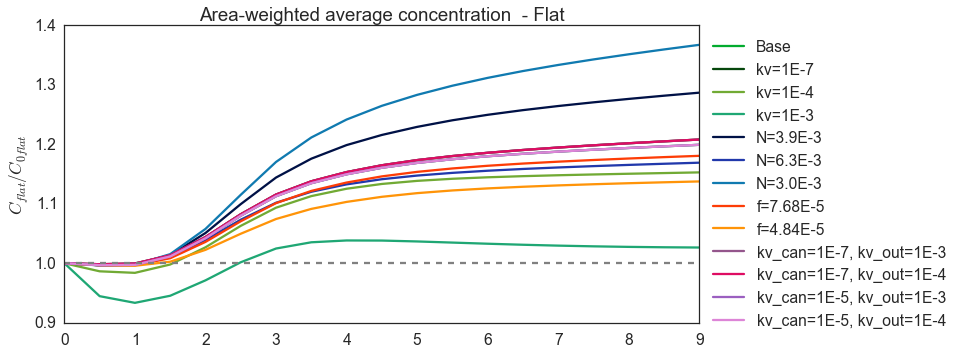

In [52]:
sns.set_palette(color_pal_all)
sns.set_context('talk', font_scale=1.2)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]

times = np.arange(19)/2.0

fig,((ax1)) = plt.subplots(1, 1, figsize=(10, 5), sharex=True, sharey=True)

for ii in diffList:
    ax1.plot(times,(flatArrayDns[:,ii]/flatArrayDns[0,ii]),
             label=labelsListCanyon[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration  - Flat ' )

ax1.set_ylabel('$C_{flat}/C_{0flat}$')


ax1.legend(loc ='upper right', bbox_to_anchor=(1.41,1))    
ax1.axhline(1,linestyle = '--', color = '0.5')

#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/BotConcNfKv3D.pdf', format='pdf', dpi=1000, bbox_inches='tight')

plt.tight_layout()

plt.show()


#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/BottConcEffectAll.pdf', format='pdf', dpi=1000, bbox_inches='tight')


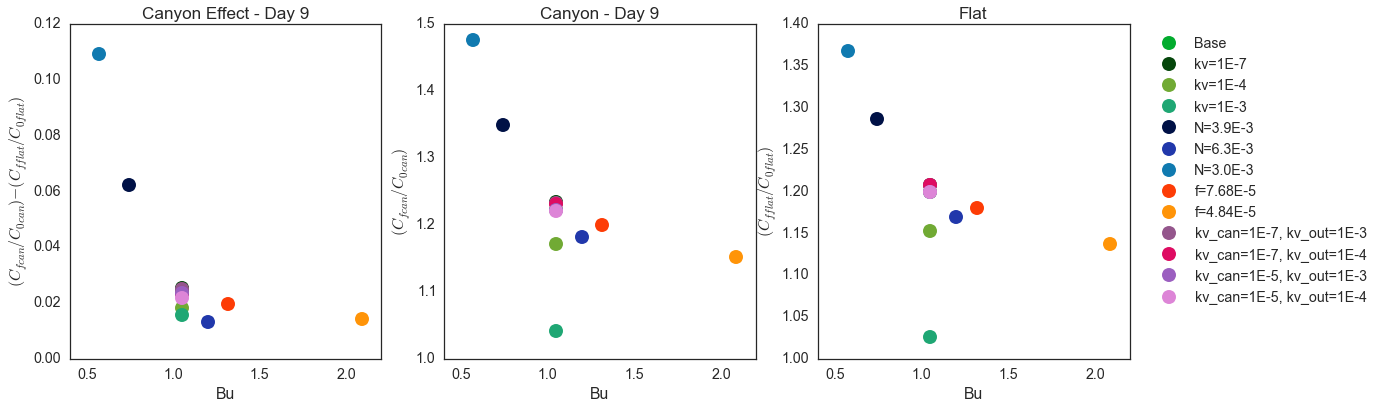

In [53]:
color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.1)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(19, 6))


jj = 0
for ii in diffList:
    ax1.plot(Bu[jj],(bottomConcCanyonDns[18,ii]/bottomConcCanyonDns[0,ii])
             -(flatArrayDns[18,ii]/flatArrayDns[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1

jj = 0
for ii in diffList:
    ax2.plot(Bu[jj],(bottomConcCanyonDns[18,ii]/bottomConcCanyonDns[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1

jj = 0
for ii in diffList:
    ax3.plot(Bu[jj],(flatArrayDns[18,ii]/flatArrayDns[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1



ax2.set_title('Canyon - Day 9')
ax1.set_title('Canyon Effect - Day 9')
ax3.set_title('Flat')
    
ax1.set_ylabel('$(C_{fcan}/C_{0can})-(C_{fflat}/C_{0flat}) $')
ax2.set_ylabel('$(C_{fcan}/C_{0can}) $')
ax3.set_ylabel('$(C_{fflat}/C_{0flat}) $')
    
ax1.set_xlabel('Bu')
ax2.set_xlabel('Bu')
ax3.set_xlabel('Bu')

ax3.legend(loc ='upper right', bbox_to_anchor=(1.80,1))    

plt.tight_layout

plt.show()

#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/ConcentrationFluxAllUpwelling.pdf', format='pdf', dpi=1000, bbox_inches='tight')


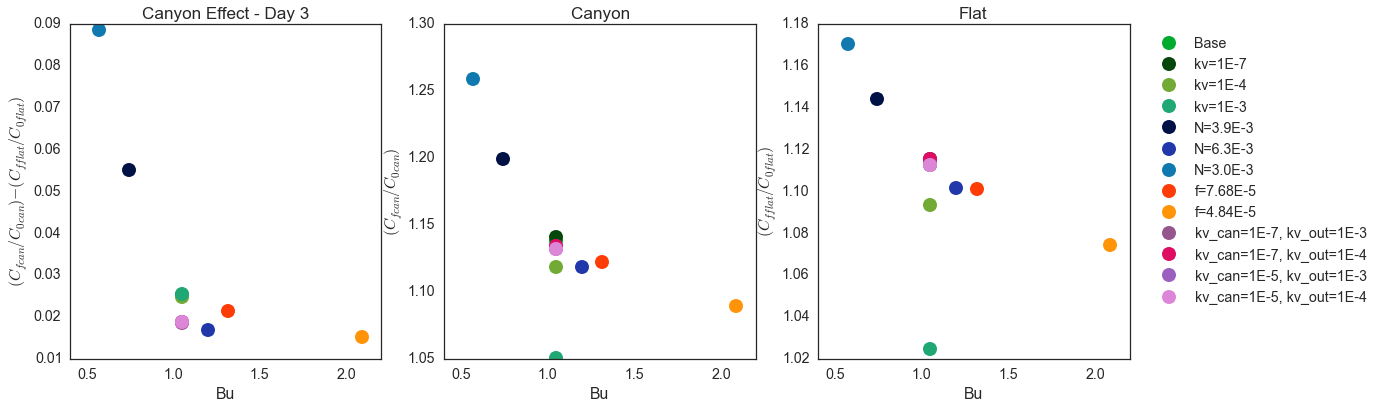

In [54]:
color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.1)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(19, 6))


jj = 0
for ii in diffList:
    ax1.plot(Bu[jj],(bottomConcCanyonDns[6,ii]/bottomConcCanyonDns[0,ii])
             -(flatArrayDns[6,ii]/flatArrayDns[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1

jj = 0
for ii in diffList:
    ax2.plot(Bu[jj],(bottomConcCanyonDns[6,ii]/bottomConcCanyonDns[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1

jj = 0
for ii in diffList:
    ax3.plot(Bu[jj],(flatArrayDns[6,ii]/flatArrayDns[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1



ax2.set_title('Canyon ')
ax1.set_title('Canyon Effect - Day 3')
ax3.set_title('Flat')
    
ax1.set_ylabel('$(C_{fcan}/C_{0can})-(C_{fflat}/C_{0flat}) $')
ax2.set_ylabel('$(C_{fcan}/C_{0can}) $')
ax3.set_ylabel('$(C_{fflat}/C_{0flat}) $')
    
ax1.set_xlabel('Bu')
ax2.set_xlabel('Bu')
ax3.set_xlabel('Bu')

ax3.legend(loc ='upper right', bbox_to_anchor=(1.80,1))    

plt.tight_layout

plt.show()

#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/ConcentrationFluxAllUpwelling.pdf', format='pdf', dpi=1000, bbox_inches='tight')


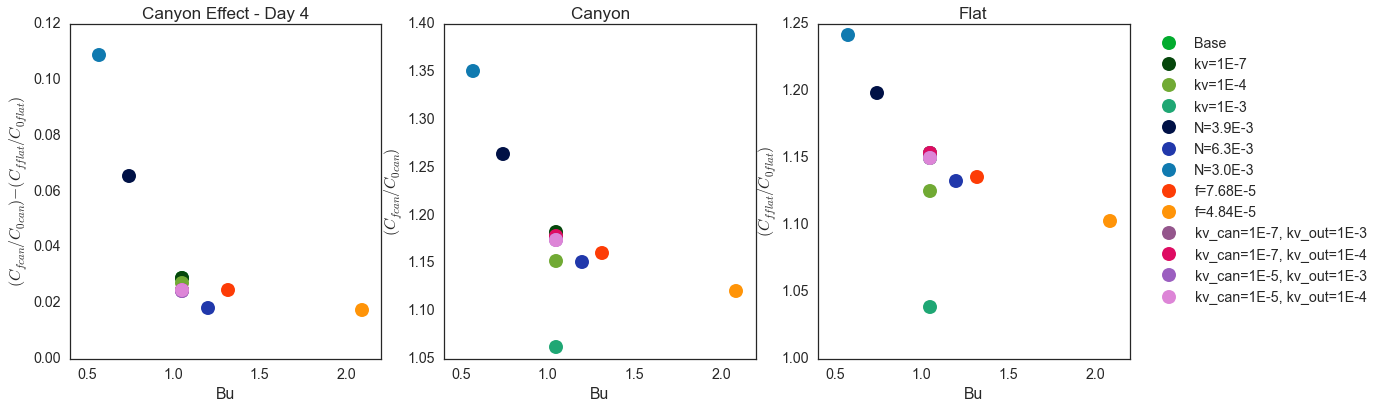

In [55]:
color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.1)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(19, 6))


jj = 0
for ii in diffList:
    ax1.plot(Bu[jj],(bottomConcCanyonDns[8,ii]/bottomConcCanyonDns[0,ii])
             -(flatArrayDns[8,ii]/flatArrayDns[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1

jj = 0
for ii in diffList:
    ax2.plot(Bu[jj],(bottomConcCanyonDns[8,ii]/bottomConcCanyonDns[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1

jj = 0
for ii in diffList:
    ax3.plot(Bu[jj],(flatArrayDns[8,ii]/flatArrayDns[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1



ax2.set_title('Canyon ')
ax1.set_title('Canyon Effect - Day 4')
ax3.set_title('Flat')
    
ax1.set_ylabel('$(C_{fcan}/C_{0can})-(C_{fflat}/C_{0flat}) $')
ax2.set_ylabel('$(C_{fcan}/C_{0can}) $')
ax3.set_ylabel('$(C_{fflat}/C_{0flat}) $')
    
ax1.set_xlabel('Bu')
ax2.set_xlabel('Bu')
ax3.set_xlabel('Bu')

ax3.legend(loc ='upper right', bbox_to_anchor=(1.80,1))    

plt.tight_layout

plt.show()

#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/ConcentrationFluxAllUpwelling.pdf', format='pdf', dpi=1000, bbox_inches='tight')


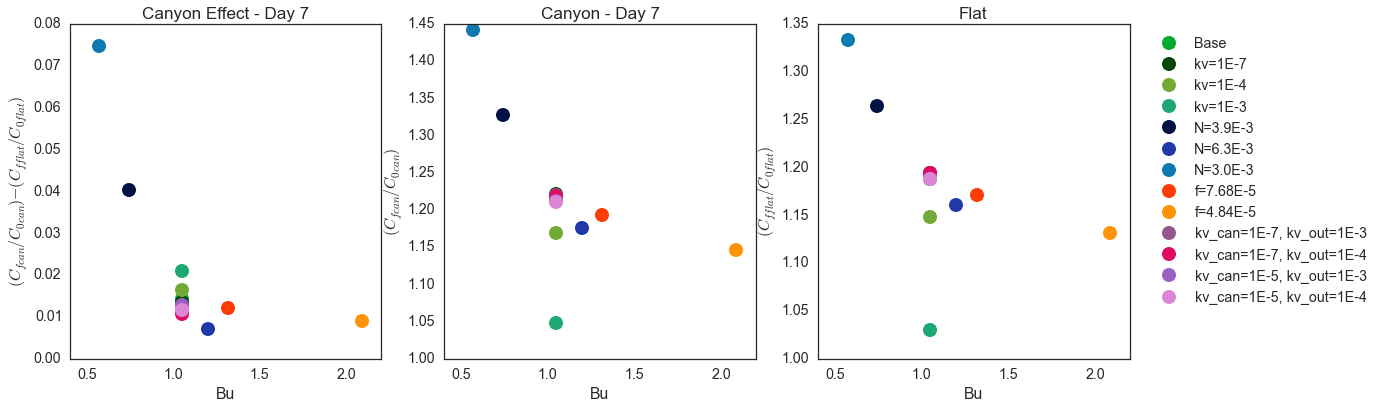

In [56]:
color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.1)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(19, 6))


jj = 0
for ii in diffList:
    ax1.plot(Bu[jj],(bottomConcCanyonDns[14,ii]/bottomConcCanyonDns[0,ii])
             -(flatArrayDns[18,ii]/flatArrayDns[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1

jj = 0
for ii in diffList:
    ax2.plot(Bu[jj],(bottomConcCanyonDns[14,ii]/bottomConcCanyonDns[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1

jj = 0
for ii in diffList:
    ax3.plot(Bu[jj],(flatArrayDns[14,ii]/flatArrayDns[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1



ax2.set_title('Canyon - Day 7')
ax1.set_title('Canyon Effect - Day 7')
ax3.set_title('Flat')
    
ax1.set_ylabel('$(C_{fcan}/C_{0can})-(C_{fflat}/C_{0flat}) $')
ax2.set_ylabel('$(C_{fcan}/C_{0can}) $')
ax3.set_ylabel('$(C_{fflat}/C_{0flat}) $')
    
ax1.set_xlabel('Bu')
ax2.set_xlabel('Bu')
ax3.set_xlabel('Bu')

ax3.legend(loc ='upper right', bbox_to_anchor=(1.80,1))    

plt.tight_layout

plt.show()

#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/ConcentrationFluxAllUpwelling.pdf', format='pdf', dpi=1000, bbox_inches='tight')


## Only downstream shelf and cross-shelf at approx y=65km)

XC AND YC INDICES = [:290,100:]

In [58]:
fileCanyonDnsSmall = '../results/metricsDataFrames/bottomConcentrationAreaFiltCanyonRuns_NoShallowDnStream.csv'

df = pd.read_csv(fileCanyonDnsSmall)
columns = df.columns.values.tolist()

time = df['day']

bottomConcCanyonDnsSmall = np.empty((len(time),len(columns[2:])))

ii=0

for col in columns[2:]:
    
    bottomConcCanyonDnsSmall[:,ii] = df[col] 
    ii=ii+1


In [59]:
fileFlatDnsSmall = '../results/metricsDataFrames/bottomConcentrationAreaFiltFlatRuns_NoShallowDnStream.csv'

df2 = pd.read_csv(fileFlatDnsSmall)
columns2 = df2.columns.values.tolist()

time2 = df2['day']

bottomConcFlatDnsSmall = np.empty((len(time2),len(columns2[2:])))

ii=0
for col in columns2[2:]:
    bottomConcFlatDnsSmall[:,ii] = df2[col] 
    ii=ii+1



In [60]:
flatArrayDnsSmall = np.empty((len(time),len(labelsListCanyon)))

flatArrayDnsSmall[:,0] = bottomConcFlatDnsSmall[:,0]
flatArrayDnsSmall[:,1] = bottomConcFlatDnsSmall[:,0]
flatArrayDnsSmall[:,2] = bottomConcFlatDnsSmall[:,0]
flatArrayDnsSmall[:,3] = bottomConcFlatDnsSmall[:,3]
flatArrayDnsSmall[:,4] = bottomConcFlatDnsSmall[:,4]
flatArrayDnsSmall[:,5] = bottomConcFlatDnsSmall[:,5]
flatArrayDnsSmall[:,6] = bottomConcFlatDnsSmall[:,6]
flatArrayDnsSmall[:,7] = bottomConcFlatDnsSmall[:,7]
flatArrayDnsSmall[:,8] = bottomConcFlatDnsSmall[:,8]
flatArrayDnsSmall[:,9] = bottomConcFlatDnsSmall[:,1]
flatArrayDnsSmall[:,10] = bottomConcFlatDnsSmall[:,2]
flatArrayDnsSmall[:,11] = bottomConcFlatDnsSmall[:,0]
flatArrayDnsSmall[:,12] = bottomConcFlatDnsSmall[:,0]
flatArrayDnsSmall[:,13] = bottomConcFlatDnsSmall[:,8]
flatArrayDnsSmall[:,14] = bottomConcFlatDnsSmall[:,8]
flatArrayDnsSmall[:,15] = bottomConcFlatDnsSmall[:,0]
flatArrayDnsSmall[:,16] = bottomConcFlatDnsSmall[:,0]

labelsListflatArrayDnsSmall =['Base flat',
                    'Base flat', 
                    'Base flat',
                    'kv=1E-4',
                    'kv=1E-3',
                    'N=3.9E-3',
                    'N=6.3E-3',
                    'N=3.0E-3',
                    'kv=1E-7',
                    'f=7.68E-5',
                    'f=4.84E-5',
                    'Base flat',
                    'Base flat',
                    'kv=1E-7',
                    'kv=1E-7',
                    'Base flat',
                    'Base flat',
]

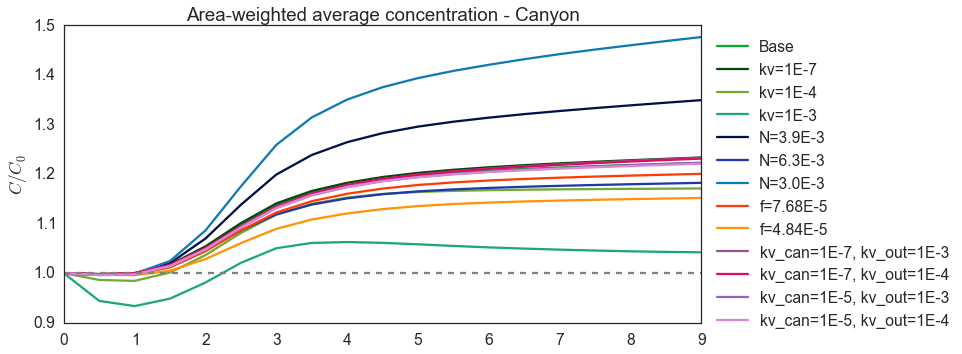

In [61]:
sns.set_palette(color_pal_all)
sns.set_context('talk', font_scale=1.2)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]

times = np.arange(19)/2.0

fig,((ax1)) = plt.subplots(1, 1, figsize=(10, 5), sharex=True, sharey=True)

for ii in diffList:
    ax1.plot(times,(bottomConcCanyonDnsSmall[:,ii]/bottomConcCanyonDnsSmall[0,ii]),
             label=labelsListCanyon[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon  ' )

ax1.set_ylabel('$C/C_0$')


ax1.legend(loc ='upper right', bbox_to_anchor=(1.41,1))    
ax1.axhline(1,linestyle = '--', color = '0.5')

#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/BotConcNfKv3D.pdf', format='pdf', dpi=1000, bbox_inches='tight')

plt.tight_layout()

plt.show()


#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/BottConcEffectAll.pdf', format='pdf', dpi=1000, bbox_inches='tight')


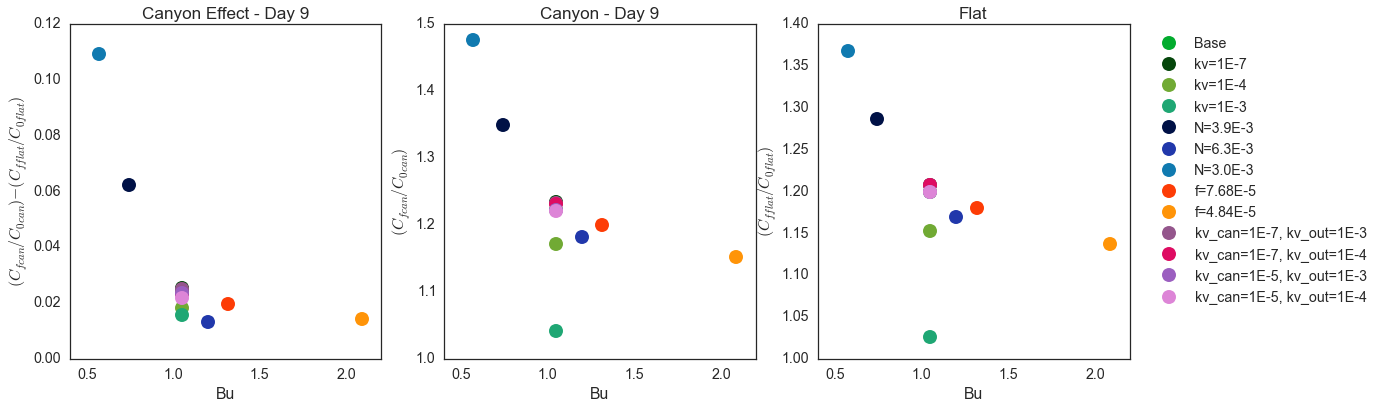

In [62]:
color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.1)

diffList = [1,8,3,4,5,6,7,9,10,13,14,15,16]


times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(19, 6))


jj = 0
for ii in diffList:
    ax1.plot(Bu[jj],(bottomConcCanyonDnsSmall[18,ii]/bottomConcCanyonDnsSmall[0,ii])
             -(flatArrayDnsSmall[18,ii]/flatArrayDnsSmall[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1

jj = 0
for ii in diffList:
    ax2.plot(Bu[jj],(bottomConcCanyonDnsSmall[18,ii]/bottomConcCanyonDnsSmall[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1

jj = 0
for ii in diffList:
    ax3.plot(Bu[jj],(flatArrayDnsSmall[18,ii]/flatArrayDnsSmall[0,ii]),
             'o',markersize=14,
            label=labelsListCanyon[ii])
    
    jj = jj + 1



ax2.set_title('Canyon - Day 9')
ax1.set_title('Canyon Effect - Day 9')
ax3.set_title('Flat')
    
ax1.set_ylabel('$(C_{fcan}/C_{0can})-(C_{fflat}/C_{0flat}) $')
ax2.set_ylabel('$(C_{fcan}/C_{0can}) $')
ax3.set_ylabel('$(C_{fflat}/C_{0flat}) $')
    
ax1.set_xlabel('Bu')
ax2.set_xlabel('Bu')
ax3.set_xlabel('Bu')

ax3.legend(loc ='upper right', bbox_to_anchor=(1.80,1))    

plt.tight_layout

plt.show()

#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/ConcentrationFluxAllUpwelling.pdf', format='pdf', dpi=1000, bbox_inches='tight')


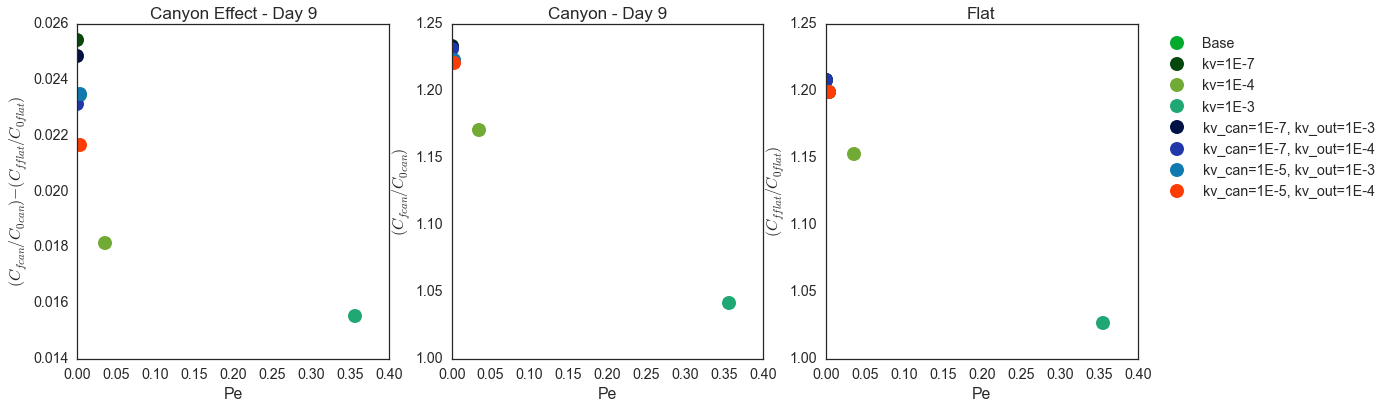

In [64]:
color_pal_Diff = sns.xkcd_palette(colors_Diff)

sns.set_palette(color_pal_Diff)

sns.set_context('talk', font_scale=1.1)

DiffCasesList = [1,8,3,4,13,14,15,16]
PeList = [0,1,2,3,9,10,11,12]

times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(19, 6))

ss=14

for ii,kk in zip(DiffCasesList,PeList):
    
    ax1.plot(Pe[kk],((bottomConcCanyonDnsSmall[18,ii]/bottomConcCanyonDnsSmall[0,ii])
          -(flatArrayDnsSmall[18,ii]/flatArrayDnsSmall[0,ii])),'o',markersize=ss,
            label=labelsListCanyon[ii])
    
for ii,kk in zip(DiffCasesList,PeList):
    ax2.plot(Pe[kk],(bottomConcCanyonDnsSmall[18,ii]/bottomConcCanyonDnsSmall[0,ii]),'o',markersize=ss,label=labelsListCanyon[ii])
    
for ii,kk in zip(DiffCasesList,PeList):
    ax3.plot(Pe[kk],(flatArrayDnsSmall[18,ii]/flatArrayDnsSmall[0,ii]),'o',markersize=ss,label=labelsListCanyon[ii])
    



ax2.set_title('Canyon - Day 9')
ax1.set_title('Canyon Effect - Day 9')
ax3.set_title('Flat')
    
ax1.set_ylabel('$(C_{fcan}/C_{0can})-(C_{fflat}/C_{0flat}) $')
ax2.set_ylabel('$(C_{fcan}/C_{0can}) $')
ax3.set_ylabel('$(C_{fflat}/C_{0flat}) $')
ax1.set_xlabel('Pe')    
ax2.set_xlabel('Pe')
ax3.set_xlabel('Pe')

ax3.legend(loc ='upper right', bbox_to_anchor=(1.80,1))    

plt.tight_layout

plt.show()

#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/ConcentrationFluxAllUpwelling.pdf', format='pdf', dpi=1000, bbox_inches='tight')
